1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt

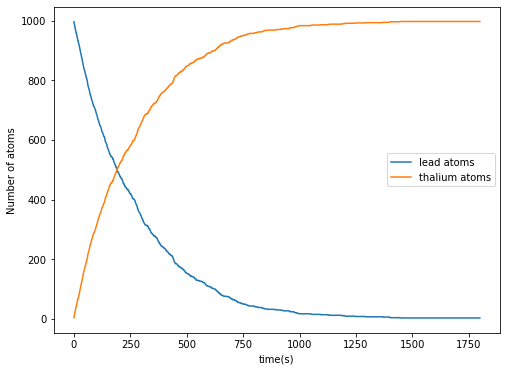

In [60]:
ti_atoms = 1000
pb_atoms = 0
tau = 3.052 * 60 #convert to seconds
total_time = np.arange(1800)

def p(t): return 1 - 2**(-t/tau)

#set initial atoms
new_pb = np.zeros(len(total_time))
new_ti = np.zeros(len(total_time))

for t in total_time:
    for i in range(ti_atoms):
        decay = np.random.random() #select a random number
        if decay < p(1): 
            #subtract number of atoms from the Tl and add them to pb by step of one
            ti_atoms -= 1
            pb_atoms += 1
            if ti_atoms == 0:
                break
    new_ti[t] = ti_atoms
    new_pb[t] = pb_atoms

    #plot results    
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(new_ti, label='lead atoms')
ax.plot(new_pb,label='thalium atoms')
ax.set_xlabel('time(s)')
ax.set_ylabel('Number of atoms')
ax.legend()


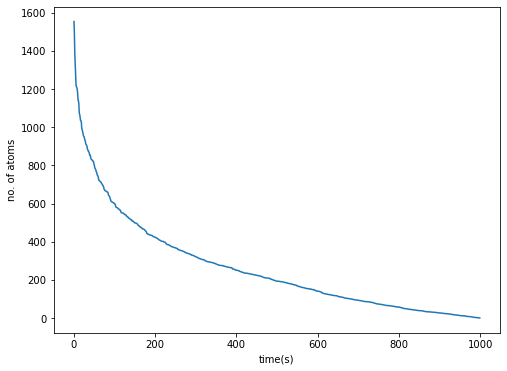

In [102]:
def p2(t, tau): return -tau*np.log(1-t)/np.log(2)

decay_t = p2(np.random.random(1000),tau)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.sort(decay_t)[::-1])
plt.xlabel('time(s)')
plt.ylabel('no. of atoms')
plt.show()



2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

result of integral: 1.358


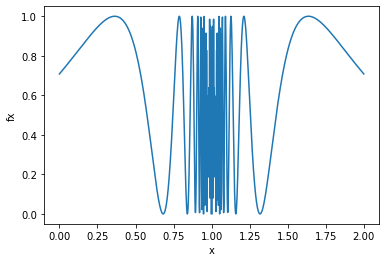

In [101]:
def f(x): return (np.sin(1. / (1 - x))**2)

x = np.linspace(0, 2, 1000)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('fx')

#with montecarlo integration
N = 1000
count = 0
for i in range(N):
    x = 2 * np.random.random()
    y = np.random.random()
    if y < f(x): count += 1
I = 2 * count / N
print("result of integral:", I)

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [100]:
def f(x, y): return x**2 + y**2 <= 1
N = 1000000
count = 0

for i in range(N):
    x = np.random.random()
    y = np.random.random()

    if (f(x, y)):
        count += 1
        
result = 4*count / N

print("Area of circle : ", result)
print("Error: ", np.pi - result)

Area of circle :  3.139008
Error:  0.0025846535897930956


In [92]:
#generalize to a 10D sphere
def f(params):
    res = 0
    for p in params:
        res += p**2
    if res <= 1:
        return 1
    return 0

N = 1000000
D = 10
count = 0

for i in range(N):
    params = []
    for i in range(D):
        params.append(np.random.random())

    if (f(params)):
        count += 1
        
I=2**D*count/N

print("integral of 10D sphere: ", I)



10-D Sphere integral:  2.60608


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [3]:
def f(x): return 1/((np.exp(x)+1)*np.sqrt(x))

def w(x): return 1/np.sqrt(x)

N = 100000
y = np.random.uniform(0,1,N)**2 
w_int = 2 
I = (1/N) * np.sum(f(y)/w(y)) * w_int

print('value of the intergral:', I)

value of the intergral: 0.8385354915661203
